# 数据覆盖全 10dB以上有拐点

2023-05-25 21:30:22.856333: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         5.0|  1.184e-01|  6.593e-02|           17282|     4.801e-02|     2.514e-02|               6591|   1.781e-02|   9.418e-03|          

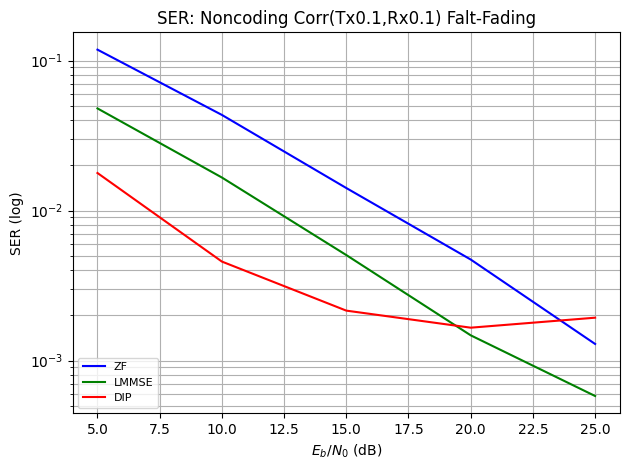

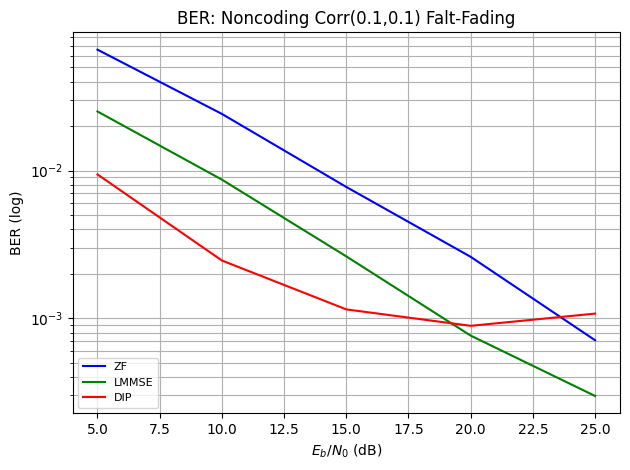

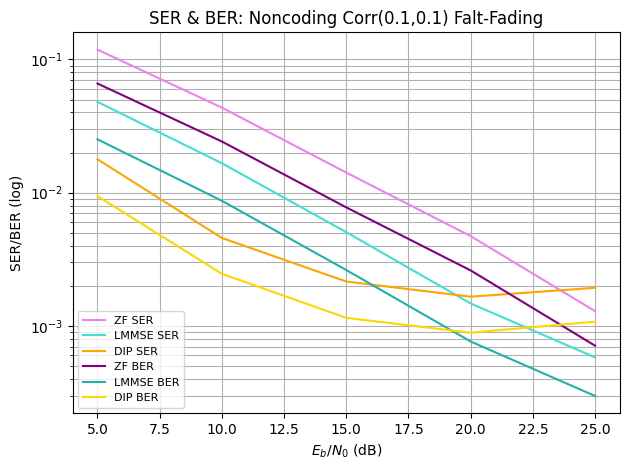

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.5                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         5.0|  1.545e-01|  8.655e-02|           22689|     6.494e-02|     3.414e-02|               8950|   2.776e-02|   1.483e-02|             3887|      2.780e+03|
|---

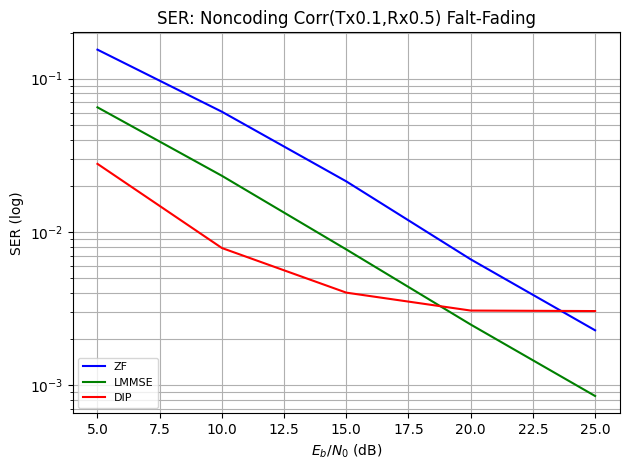

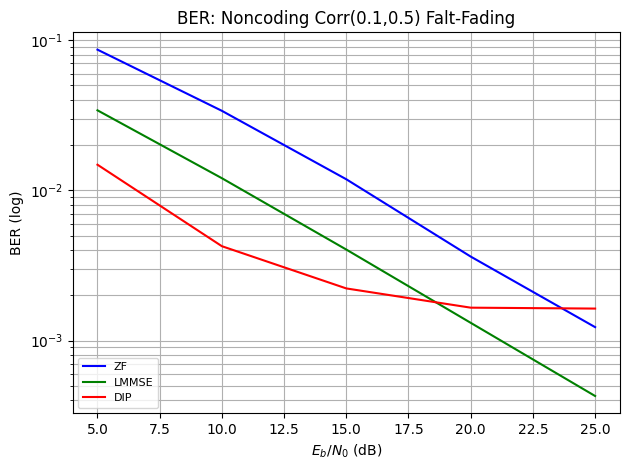

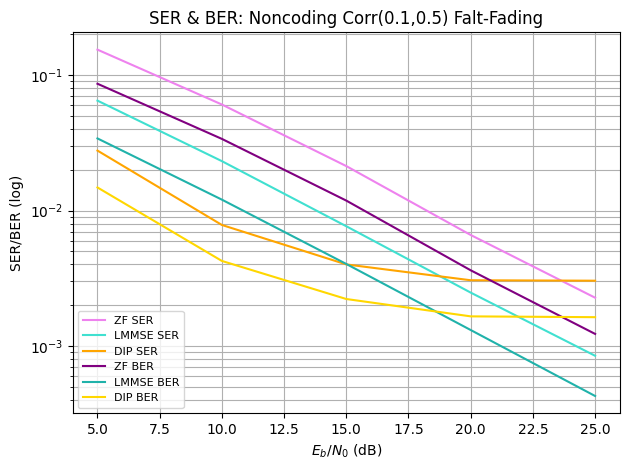

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         5.0|  3.800e-01|  2.214e-01|           58045|     1.829e-01|     9.871e-02|              25876|   1.305e-01|   7.119e-02|            18661|      3.152e+03|
|---

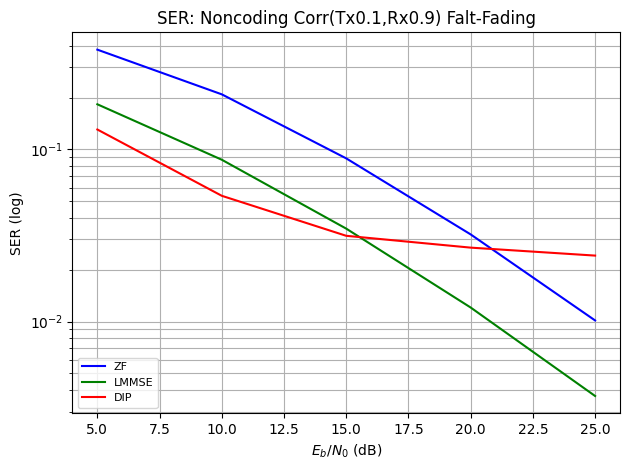

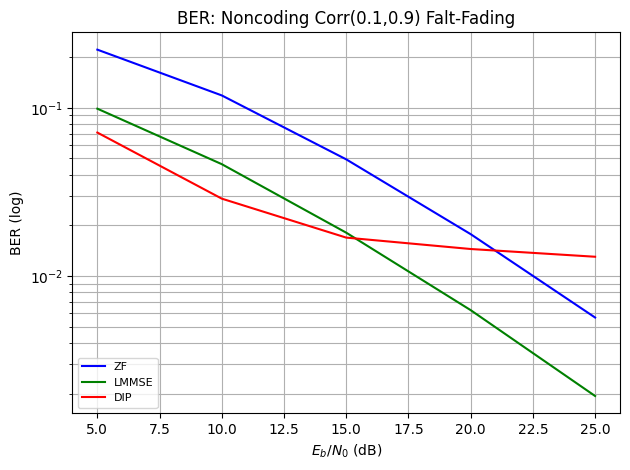

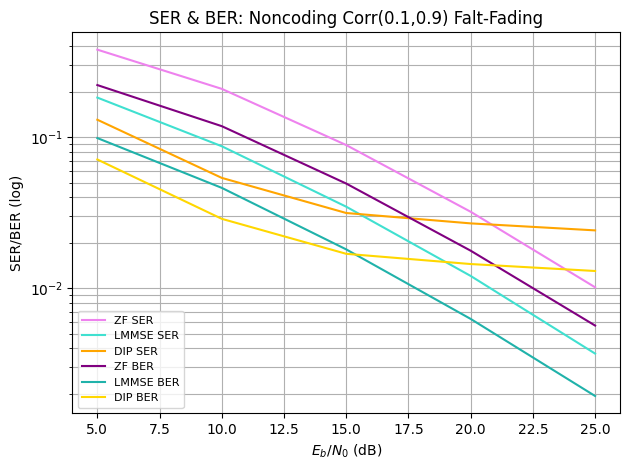

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.5 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         5.0|  1.579e-01|  8.844e-02|           23184|     6.474e-02|     3.387e-02|               8880|   2.700e-02|   1.435e-02|             3763|      2.915e+03|
|---

KeyboardInterrupt: 

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NoncodingFlatFadingSpatial import NoncodingFlatFadingSpatial

Block_Length = 256              # Block Length (k)
NUM_BITS_PER_SYMBOL = 2         # Mapping: 4QAM
CONSTELLATION_TYPE = "qam"      # Constellation/Modulation Type
DEMAPPING_METHOD = "app"        # Demapping Method: "app"
NUM_TX_ANT = 4                  # Transmit Antennas
NUM_RX_ANT = 4                  # Receive Antennas
CORRELATION_INDEX_MIN = 0.1     # Minimum Spatial Correlation
CORRELATION_INDEX_MAX = 0.9     # Maximum Spatial Correlation
CORRELATION_INDEX_POINTS = 3    # Correlation Points between Max and Min

NUM_DATA_GROUP = 1              # Number of Data Group
BATCH_SIZE = 256                # Number of Parallelly Processed Batches
EBN0_DB_MIN = 5.0               # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 25.0              # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5             # EBNO Points

model_uncoding_ff_saptial = NoncodingFlatFadingSpatial(Block_Length, 
                                                       NUM_BITS_PER_SYMBOL,
                                                       CONSTELLATION_TYPE,
                                                       DEMAPPING_METHOD,
                                                       NUM_RX_ANT,
                                                       NUM_TX_ANT,
                                                       CORRELATION_INDEX_MIN,
                                                       CORRELATION_INDEX_MAX,
                                                       CORRELATION_INDEX_POINTS)

model_uncoding_ff_saptial(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)